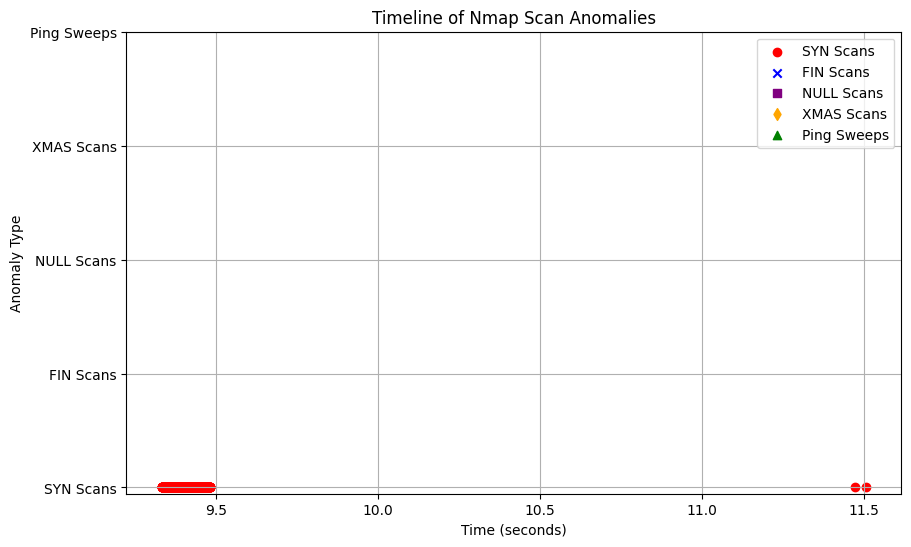

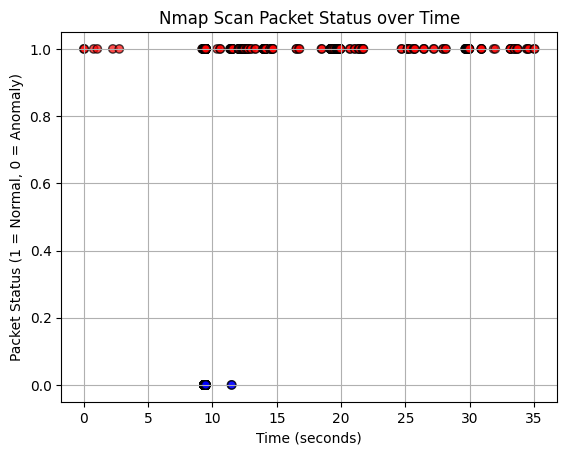

Total Packets: 2296
Normal Packets: 1294
Anomalous Packets: 1002

Anomaly Counts:
SYN Scans: 1002
FIN Scans: 0
NULL Scans: 0
XMAS Scans: 0
Ping Sweeps: 0


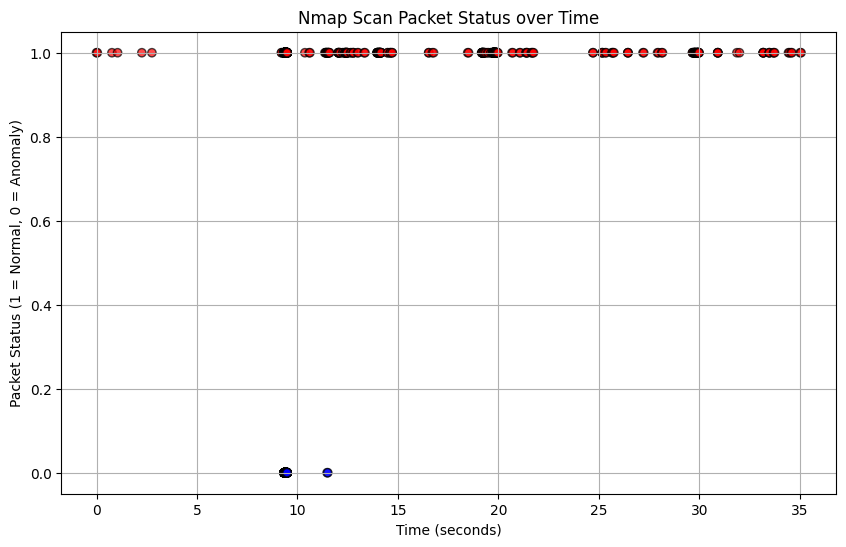

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Nmap scan data
df = pd.read_csv('nmap_file.csv')

# Display the first few rows
df.head(10)

# Filter for TCP and ICMP traffic
tcp_data = df[df['Protocol'] == 'TCP']
icmp_data = df[df['Protocol'] == 'ICMP']

# Detect SYN scans - High volume of SYN packets
syn_scans = tcp_data[tcp_data['Info'].str.contains(r'\bSYN\b', case=False, na=False)]

# Detect unusual TCP flags (e.g., FIN, NULL, XMAS scans)
fin_scans = tcp_data[tcp_data['Info'].str.contains(r'\bFIN\b', case=False, na=False)]
null_scans = tcp_data[tcp_data['Info'] == '']
xmas_scans = tcp_data[tcp_data['Info'].str.contains(r'\bXMAS\b', case=False, na=False)]

# Detect ICMP Echo Requests (ping sweeps)
ping_sweeps = icmp_data[icmp_data['Info'].str.contains(r'\bEcho\b', case=False, na=False)]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Plotting the anomalies over time
plt.figure(figsize=(10, 6))

# Plot SYN Scans
plt.scatter(syn_scans['Time'], [1] * len(syn_scans), color='red', label='SYN Scans', marker='o')

# Plot FIN Scans
plt.scatter(fin_scans['Time'], [2] * len(fin_scans), color='blue', label='FIN Scans', marker='x')

# Plot NULL Scans
plt.scatter(null_scans['Time'], [3] * len(null_scans), color='purple', label='NULL Scans', marker='s')

# Plot XMAS Scans
plt.scatter(xmas_scans['Time'], [4] * len(xmas_scans), color='orange', label='XMAS Scans', marker='d')

# Plot Ping Sweeps
plt.scatter(ping_sweeps['Time'], [5] * len(ping_sweeps), color='green', label='Ping Sweeps', marker='^')

# Add labels and legend
plt.title('Timeline of Nmap Scan Anomalies')
plt.xlabel('Time (seconds)')
plt.ylabel('Anomaly Type')
plt.yticks([1, 2, 3, 4, 5], ['SYN Scans', 'FIN Scans', 'NULL Scans', 'XMAS Scans', 'Ping Sweeps'])
plt.legend()

# Show grid for easier readability
plt.grid(True)

# Show plot
plt.show()

# Add a new 'Status' column and initially set all values to 1 (normal packet)
df['Status'] = 1

# Define anomaly conditions
anomaly_conditions = [
    df['Info'].str.contains(r'\bSYN\b', case=False, na=False),
    df['Info'].str.contains(r'\bFIN\b', case=False, na=False),
    df['Info'] == '',
    df['Info'].str.contains(r'\bXMAS\b', case=False, na=False),
    (df['Protocol'] == 'ICMP') & (df['Info'].str.contains(r'\bEcho\b', case=False, na=False))
]

# Apply conditions to mark anomalies with 0
for condition in anomaly_conditions:
    df.loc[condition, 'Status'] = 0

# Save the updated dataframe back to a CSV file
df.to_csv('nmap_updated_file_with_status.csv', index=False)

# Plot the data: Time vs. Status
if 'Status' in df.columns:
    plt.scatter(df['Time'], df['Status'], c=df['Status'], cmap='bwr', alpha=0.7, edgecolor='k')
else:
    print("The 'Status' column does not exist in the DataFrame.")
plt.ylabel('Packet Status (1 = Normal, 0 = Anomaly)')
plt.xlabel('Time (seconds)')
plt.title('Nmap Scan Packet Status over Time')
plt.grid(True)

# Display the plot
plt.show()

# Plotting the number of each type of anomaly
anomaly_counts = {
    'SYN Scans': len(syn_scans),
    'FIN Scans': len(fin_scans),
    'NULL Scans': len(null_scans),
    'XMAS Scans': len(xmas_scans),
    'Ping Sweeps': len(ping_sweeps)
}

# Add a new 'Status' column and initially set all values to 1 (normal packet)
df['Status'] = 1

# Define anomaly conditions and apply them to mark anomalies with 0
anomaly_conditions = [
    df['Info'].str.contains(r'\bSYN\b', case=False, na=False),
    df['Info'].str.contains(r'\bFIN\b', case=False, na=False),
    df['Info'] == '',
    df['Info'].str.contains(r'\bXMAS\b', case=False, na=False),
    (df['Protocol'] == 'ICMP') & (df['Info'].str.contains(r'\bEcho\b', case=False, na=False))
]

for condition in anomaly_conditions:
    df.loc[condition, 'Status'] = 0

# Summary statistics
normal_packets = df[df['Status'] == 1]
anomalous_packets = df[df['Status'] == 0]

print("Total Packets:", len(df))
print("Normal Packets:", len(normal_packets))
print("Anomalous Packets:", len(anomalous_packets))
print("\nAnomaly Counts:")
for anomaly, count in anomaly_counts.items():
    print(f"{anomaly}: {count}")

# Plot the data: Time vs. Status
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Status'], c=df['Status'], cmap='bwr', alpha=0.7, edgecolor='k')
plt.ylabel('Packet Status (1 = Normal, 0 = Anomaly)')
plt.xlabel('Time (seconds)')
plt.title('Nmap Scan Packet Status over Time')
plt.grid(True)
plt.show()

df.to_csv('nmap_updated_file_with_status.csv', index=False)
